In [1]:
import numpy as np
np.seterr(over='ignore')
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11501568/11490434 [==============================] - 1s 0us/step


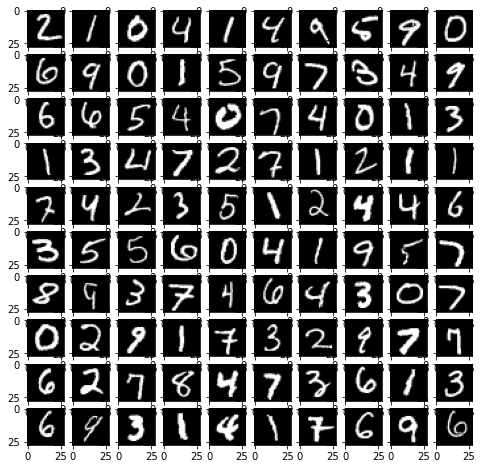

In [4]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [5]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [6]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [7]:
# Changing dimensions to N x D = 28x28
# Number of samples you want in training data. 60,000 is max.
N = 50000
x_tr = []
for i in range(N):
    x_tr.append(x_train[i,:].flatten())
x_te = []
for i in range(10000):
    x_te.append(x_test[i,:].flatten())

In [8]:
print(len(x_tr),len(x_tr[0]))
print(len(x_te),len(x_te[0]))

50000 784
10000 784


In [9]:
# defining the Nearest Neighbour Classifier
class NN:
    def __init__(self):
        pass
    
    # Memorize the training data    
    def train(self, X, y):
        # X is 2D if size N x D = 28x28, so each row is an example
        # y is 1D of size N
        self.tr_x = X
        self.tr_y = y
        
    # For the test image:
    #  find nearest train image with minimum distance from the test image
    #  predict the label of nearest training image
    def predict(self, x):
        # x is of size D = 28x28 for which we want to predict the label
        # returns the predicted label for the input x
        min_idx = None
        min_dist = 100000000
        for test_sample in range(len(self.tr_x)):
            dist = 0
            for each_value in range(len(self.tr_x[0])):
                # using L1 distance
                dist += abs(float((self.tr_x[test_sample][each_value] - x[each_value])))
            if dist < min_dist:
                min_dist = dist
                min_idx = test_sample
        return self.tr_y[min_idx]   

In [10]:
classifier = NN()

In [11]:
classifier.train(x_tr, y_train)

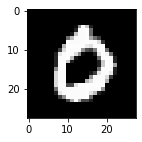

0


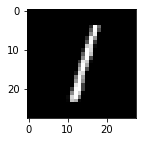

1


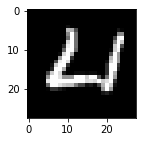

1


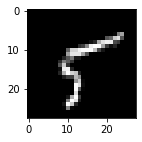

5


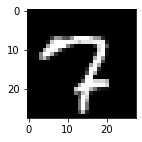

7


In [12]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[3],cmap="gray")
plt.show()
print(classifier.predict(x_te[3]))
plt.figure(figsize=(2,2))
plt.imshow(x_test[2],cmap="gray")
plt.show()
print(classifier.predict(x_te[2]))
plt.figure(figsize=(2,2))
plt.imshow(x_test[33],cmap="gray")
plt.show()
print(classifier.predict(x_te[33]))
plt.figure(figsize=(2,2))
plt.imshow(x_test[59],cmap="gray")
plt.show()
print(classifier.predict(x_te[59]))
plt.figure(figsize=(2,2))
plt.imshow(x_test[36],cmap="gray")
plt.show()
print(classifier.predict(x_te[36]))